In [1]:

from SPARQLWrapper import SPARQLWrapper, JSON
from IPython.core.display import display, HTML
import pandas as pd
import re

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


In [2]:
endpoint = 'http://data.bibliotheken.nl/sparql'
sparql = SPARQLWrapper(endpoint)

def run_query(sparql_query):
    sparql.setQuery(sparql_query)
    sparql.setReturnFormat(JSON)
    data = sparql.query().convert()
    df = pd.json_normalize(data['results']['bindings'])  
    print(df.shape)

    for i,row in df.iterrows():
        for column in df.columns:
            if re.search('value$' , column):
                print( f'{column} => {row[column]}' )
        print('-------')
    return df

http://data.bibliotheken.nl/doc/dataset/stcn
    
https://ecritures.medium.com/data-bibliotheken-nl-bevragen-via-de-wikidata-query-service-wdqs-e593a6a36d8c

https://ecritures.medium.com/topstukken-in-de-koninklijke-bibliotheek-b32780f314f8

In [3]:
query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?o ?p WHERE {
  
<http://data.bibliotheken.nl/id/nbt/p192741446> ?o ?p .

}

"""

df = run_query(query)



(20, 4)
o.value => http://www.w3.org/1999/02/22-rdf-syntax-ns#type
p.value => http://schema.org/CreativeWork
-------
o.value => http://www.w3.org/1999/02/22-rdf-syntax-ns#type
p.value => http://schema.org/Book
-------
o.value => http://www.w3.org/1999/02/22-rdf-syntax-ns#type
p.value => http://schema.org/ProductModel
-------
o.value => http://schema.org/author
p.value => nodeID://b266094235
-------
o.value => http://schema.org/alternateName
p.value => Het vermakelijck landt-leven. Part 3
-------
o.value => http://schema.org/description
p.value => Includes: Den naerstigen byen-houder, onderrechtende hoe men [...] de byen [...] onderhouden sal; and: De verstandige kock, of Sorghvuldige huyshoudster
-------
o.value => http://schema.org/about
p.value => http://data.bibliotheken.nl/id/thes/p155446258
-------
o.value => http://schema.org/about
p.value => http://data.bibliotheken.nl/id/thes/p155446223
-------
o.value => http://schema.org/inLanguage
p.value => nl
-------
o.value => http://sche

In [4]:
#

query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?o ?p WHERE {
  
<http://data.bibliotheken.nl/id/nbt/p357539168> ?o ?p .

}

"""

df = run_query(query)


(15, 5)
o.value => http://www.w3.org/1999/02/22-rdf-syntax-ns#type
p.value => http://schema.org/CreativeWork
-------
o.value => http://www.w3.org/1999/02/22-rdf-syntax-ns#type
p.value => http://schema.org/Book
-------
o.value => http://www.w3.org/1999/02/22-rdf-syntax-ns#type
p.value => http://schema.org/ProductModel
-------
o.value => http://www.w3.org/2000/01/rdf-schema#label
p.value => Het stenen bruidsbed : roman / Harry Mulisch
-------
o.value => http://schema.org/isbn
p.value => 9789023476825
-------
o.value => http://schema.org/author
p.value => http://data.bibliotheken.nl/id/thes/p06854796X
-------
o.value => http://schema.org/sameAs
p.value => http://www.worldcat.org/oclc/844922907
-------
o.value => http://schema.org/description
p.value => 1e dr.: 1959. - (Literaire reuzenpocket ; 1)
-------
o.value => http://schema.org/bookEdition
p.value => 44e dr
-------
o.value => http://schema.org/inLanguage
p.value => nl
-------
o.value => http://schema.org/name
p.value => Het stenen br

In [5]:

query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?resource WHERE {
  
?resource schema:isPartOf <http://data.bibliotheken.nl/id/dataset/stcn> 

}
LIMIT 50

"""

df = run_query(query)




(50, 2)
resource.value => http://data.bibliotheken.nl/id/dataset/stcn/thes
-------
resource.value => http://data.bibliotheken.nl/id/dataset/stcn/printers
-------
resource.value => nodeID://b265835918
-------
resource.value => nodeID://b265835921
-------
resource.value => nodeID://b265835923
-------
resource.value => nodeID://b265835924
-------
resource.value => nodeID://b265835926
-------
resource.value => nodeID://b265835928
-------
resource.value => nodeID://b265835931
-------
resource.value => nodeID://b265835933
-------
resource.value => nodeID://b265835935
-------
resource.value => nodeID://b265835938
-------
resource.value => nodeID://b265835939
-------
resource.value => nodeID://b265835944
-------
resource.value => nodeID://b265835948
-------
resource.value => nodeID://b265835949
-------
resource.value => nodeID://b265835950
-------
resource.value => nodeID://b265835951
-------
resource.value => nodeID://b265835952
-------
resource.value => nodeID://b265835953
-------
resource.v

In [12]:
#http://data.bibliotheken.nl/id/thes/p075545349


query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?resource ?title ?author_name ?format ?publ_year ?subject_label ?collection WHERE {
  
?resource schema:publication ?publ .
?publ schema:publishedBy <http://data.bibliotheken.nl/id/thes/p075545349> .
?resource kb:bibliographicFormat ?format .
OPTIONAL {
?resource schema:name ?title . }
OPTIONAL {
?resource schema:author ?author . 
?author schema:name ?author_name . }
OPTIONAL {
?publ schema:startDate ?publ_year . }
OPTIONAL {
?publ schema:startDate ?publ_year . }
OPTIONAL { 
?resource schema:about ?subject .
?subject skos:prefLabel ?subject_label .
} OPTIONAL {
?resource schema:mainEntityOfPage ?part_of . 
?part_of schema:isPartOf ?collection .
}


}
"""
df = run_query(query)

(1342, 14)
resource.value => http://data.bibliotheken.nl/id/nbt/p108214648
title.value => Catalogvs bibliothecæ pvblicæ Lugduno-Batavæ
format.value => 4°
publ_year.value => 1636
subject_label.value => Documentary information
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => nan
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p108214974
title.value => Catalogus librorvm qvi in bibliopolio Elseviriano venales exstant
format.value => 4°
publ_year.value => 1634
subject_label.value => Documentary information
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => nan
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p110602390
title.value => Dispvtatio juridica de evictionibvs.
format.value => 4°
publ_year.value => 1630
subject_label.value => Law
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Melchior de Jonge
-------
resource.value => http://data.bibliotheken.nl/id/

title.value => Disputatio philosophica de usu philosophiae, prima.
format.value => 4°
publ_year.value => 1652
subject_label.value => Philosophy
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Godefridus de Ruyter
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p142256153
title.value => Dispvtationvm physicarvm dvodecima, de elementis, ut sunt partes mundi.
format.value => 4°
publ_year.value => 1631
subject_label.value => Philosophy
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Franco Burgersdicius
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p142256412
title.value => Dispvtationvm physicarvm decima-tertia, de elementis in ordine ad mistionem.
format.value => 4°
publ_year.value => 1631
subject_label.value => Philosophy
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Franco Burgersdicius
-------
resource.value => http://data.bibliotheken.nl/id/nbt/

title.value => Omnia quæ extant.
format.value => 24°
publ_year.value => 1633
subject_label.value => General works
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => A. Gislenius Busbequius
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p833597396
title.value => Epistolarvm liber.
format.value => 8°
publ_year.value => 1647
subject_label.value => General works
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Ph. Melanchthon
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p833597485
title.value => [Opera].
format.value => 12°
publ_year.value => 1634
subject_label.value => History (antiquity)
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => C. Cornelius Tacitus
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p833597604
title.value => Les satyres, et autres oeuvres.
format.value => 12°
publ_year.value => 1642
subject_label.value => French language

resource.value => http://data.bibliotheken.nl/id/nbt/p832850101
title.value => Introdvctionis in vniversam geographiam, tam veterem quàm novam, libri VI.
format.value => 24°
publ_year.value => 1629
subject_label.value => Geography
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Philippus Cluverius
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p832850152
title.value => Proxeneta, seu De prudentia ciuili liber.
format.value => 12°
publ_year.value => 1627
subject_label.value => Political science
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Hieronymus Cardanus
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p832850306
title.value => Opera.
format.value => 16°
publ_year.value => 1629
subject_label.value => Latin language and literature
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Pub. Ovidius Naso
-------
resource.value => http://data.bibliotheken

resource.value => http://data.bibliotheken.nl/id/nbt/p407955585
title.value => Collationvm theologicarvm de principio euangelii Johannis vicesima.
format.value => 4°
publ_year.value => 1651
subject_label.value => Theology (Bible and Bible interpretation)
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Winandus Neostadius
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p407955631
title.value => Collationvm theologicarvm de principio euangelii Johannis vicesima prima et ultima.
format.value => 4°
publ_year.value => 1651
subject_label.value => Theology (Bible and Bible interpretation)
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Philippus Baldaeus
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p413730123
title.value => Lexicon Græco-Latinum.
format.value => 2°
publ_year.value => 1652
subject_label.value => Greek language and literature
collection.value => http://data.bibliotheken.nl/id/

-------
resource.value => http://data.bibliotheken.nl/id/nbt/p065775236
title.value => Disputationum anti-anabaptisticarum decima-quarta anaskeuastikê, de authoritate librorum apocryphorum in condendis & probandis fidei articulis.
format.value => 4°
publ_year.value => 1646
subject_label.value => Theology (Christian doctrine)
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Fridericus Spanhemius
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p065775724
title.value => Disputationum anti-anabaptisticarum decima-quinta anaskeuastikê, de authoritate librorum apocryphorum in condendis & probandis fidei articulis.
format.value => 4°
publ_year.value => 1646
subject_label.value => Theology (Christian doctrine)
collection.value => http://data.bibliotheken.nl/id/dataset/stcn
author_name.value => Fridericus Spanhemius
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p065776178
title.value => Disputationum anti-anabaptisticarum decima-

In [7]:
df.columns

Index(['resource.type', 'resource.value', 'title.type', 'title.value',
       'format.type', 'format.value', 'publ_year.type', 'publ_year.value',
       'subject_label.type', 'subject_label.value', 'author_name.type',
       'author_name.value'],
      dtype='object')

In [8]:
for i,row in df.iterrows():
    print((i+1), row['title.value'], row['author_name.value'] , row['publ_year.value'] , row['resource.value'])

1 Catalogvs bibliothecæ pvblicæ Lugduno-Batavæ nan 1636 http://data.bibliotheken.nl/id/nbt/p108214648
2 Catalogus librorvm qvi in bibliopolio Elseviriano venales exstant nan 1634 http://data.bibliotheken.nl/id/nbt/p108214974
3 Dispvtatio juridica de evictionibvs. Melchior de Jonge 1630 http://data.bibliotheken.nl/id/nbt/p110602390
4 Oratio de differentia inter consolationes ethnicas ac christianas amicis plaga mortifera afflictis inculcandas. Johannes Polyander 1636 http://data.bibliotheken.nl/id/nbt/p111024196
5 Oratio inauguralis de officio theologi. Fridericus Spanhemius 1643 http://data.bibliotheken.nl/id/nbt/p111781531
6 Dispvtationvm jvridicarvm prima, de statutis, seu institutis civitatum. Jacobus Maestertius 1640 http://data.bibliotheken.nl/id/nbt/p111966043
7 Dispvtationvm jvridicarvm secvnda, de vi ac potestate legis. Jacobus Maestertius 1640 http://data.bibliotheken.nl/id/nbt/p111966345
8 Dispvtationvm jvridicarvm tertia, de potestate principis. Jacobus Maestertius 1640 http

67 Dispvtationvm jvridicarvm sexagesima-secvnda, de emphyteusi. Jacobus Maestertius 1642 http://data.bibliotheken.nl/id/nbt/p112131875
68 Dispvtationvm jvridicarvm sexagesima-tertia, de præscriptis verbis, & in factum actione. Jacobus Maestertius 1642 http://data.bibliotheken.nl/id/nbt/p112132324
69 Dispvtationvm jvridicarvm sexagesima-qvarta, de servitutibus pignori dandis. Jacobus Maestertius 1642 http://data.bibliotheken.nl/id/nbt/p112132960
70 Dispvtationvm jvridicarvm sexagesima-qvinta, de tacito pignore in invectis & illatis in prædia urbana. Jacobus Maestertius 1642 http://data.bibliotheken.nl/id/nbt/p112133495
71 Carmina gratvlatoria, in honorem Ioannis Klenckii nan 1642 http://data.bibliotheken.nl/id/nbt/p112135706
72 Dispvtationvm jvridicarvm sexagesima-sexta, de prærogativa mulieris in bonis mariti. Jacobus Maestertius 1642 http://data.bibliotheken.nl/id/nbt/p112189172
73 Dispvtationvm jvridicarvm sexagesima-septima, de lege commissoria. Jacobus Maestertius 1642 http://data.

440 Dispvtationvm theologicarvm tertiò repetitarum XIII. De homine ad imaginem Dei creato. Mathias à Butevest 1633 http://data.bibliotheken.nl/id/nbt/p213131900
441 Dispvtatio theologica de sabbatho & die dominico, ejusque observatione. Dominicus Acronius 1633 http://data.bibliotheken.nl/id/nbt/p213133938
442 Dispvtationvm theologicarvm tertiò repetitarum X. De mvndi creatione. Michael Mathissevius 1633 http://data.bibliotheken.nl/id/nbt/p213134292
443 Dispvtationvm theologicarvm tertiò repetitarum VII. De S. sancta trinitate. Stephanus G. Jeneinius 1632 http://data.bibliotheken.nl/id/nbt/p213136643
444 Dispvtationvm theologicarvm quartò repetitarum XLIII. De sacramentis in genere. Johannes Ludovicus Grouwels 1638 http://data.bibliotheken.nl/id/nbt/p213690837
445 Dispvtationvm theologicarvm quartò repetitarum XXVII. De statu humiliationis Christi. Theodorus Collinus 1637 http://data.bibliotheken.nl/id/nbt/p21369137X
446 Dispvtationvm theologicarvm quarto repetitarum XIX. De idolo

499 Dispvtatio theologica, de papismo. Jacobus Ravens 1649 http://data.bibliotheken.nl/id/nbt/p303427361
500 Disputatio theologica, de papatu. Petrus de Breen 1649 http://data.bibliotheken.nl/id/nbt/p303427590
501 Opera qvæ exstant. C. Cornelius Tacitus 1620 http://data.bibliotheken.nl/id/nbt/p308183215
502 Exhortations a repentance et recognoissance: faites au subjet du siege, & de la reddition de Maestricht [...] en l'eglise françoise de la Haye. Andre Rivet 1632 http://data.bibliotheken.nl/id/nbt/p308731298
503 Instrvction preparatoire à la Saincte Cene: avec cinq predications. André Rivet 1634 http://data.bibliotheken.nl/id/nbt/p310619475
504 Aphorismi. Hippocrates  1628 http://data.bibliotheken.nl/id/nbt/p312660480
505 Lexicon Arabico-Latinum. Jacobus Golius 1653 http://data.bibliotheken.nl/id/nbt/p314773649
506 Lexicon Arabico-Latinum. Jacobus Golius 1653 http://data.bibliotheken.nl/id/nbt/p314773649
507 Le guidon de la langue italienne. Nathanael Duëz 1650 http://data.biblio

867 De ivre regni diascepsis. Alexander Irvinus 1627 http://data.bibliotheken.nl/id/nbt/p832882275
868 Vlysses Belgico-Gallicvs. Abrah. Gölnitzius 1631 http://data.bibliotheken.nl/id/nbt/p832882313
869 Vlysses Belgico-Gallicvs. Abrah. Gölnitzius 1631 http://data.bibliotheken.nl/id/nbt/p832882313
870 Opvscvla theologica. Petrus Picherellus 1629 http://data.bibliotheken.nl/id/nbt/p832882356
871 Consilivm Gregorio XV. Pontifici Maximo. Michael Lonigus 1623 http://data.bibliotheken.nl/id/nbt/p832882917
872 Oratio panegyrica. De illustri victoria, quam amplissimi rerum Indiæ Occidentalis administratores, ductu magnanimi herois Petri Henrici [...] retulerunt. Dan. Fil Daniel Colonius 1629 http://data.bibliotheken.nl/id/nbt/p83288300X
873 Oratio panegyrica. De illustri victoria, quam amplissimi rerum Indiæ Occidentalis administratores, ductu magnanimi herois Petri Henrici [...] retulerunt. Dan. Fil Daniel Colonius 1629 http://data.bibliotheken.nl/id/nbt/p83288300X
874 Hispania, sive De regi

967 Lexicon Græco-Latinum. Joan. Scapula 1652 http://data.bibliotheken.nl/id/nbt/p833015931
968 Commentarivs de rebvs pace belloqve gestis dom. Fabiani senioris burggravii à Dhona. Gerardus Johannes Vossius 1628 http://data.bibliotheken.nl/id/nbt/p833078313
969 Traicté de la cour, ou Instruction des courtisans. Du Refuge 1649 http://data.bibliotheken.nl/id/nbt/p833083767
970 Novvelle maniere de fortification par esclvses. Symon Stevin 1618 http://data.bibliotheken.nl/id/nbt/p833123467
971 Novvelle maniere de fortification par esclvses. Symon Stevin 1618 http://data.bibliotheken.nl/id/nbt/p833123467
972 La castrametation. Symon Stevin 1618 http://data.bibliotheken.nl/id/nbt/p833123548
973 La castrametation. Symon Stevin 1618 http://data.bibliotheken.nl/id/nbt/p833123548
974 Tractatus pacis, inter Hispaniam et Unitum Belgium, Monasterii. Lieuwe van Aitzema 1651 http://data.bibliotheken.nl/id/nbt/p833131087
975 Historiæ concilii Tridentini. Libri octo. Petrus Suavis Polanus 1622 http://

In [9]:

query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?p WHERE {
  
<http://data.bibliotheken.nl/id/nbt/p351195637> schema:name ?p . 

}
LIMIT 50

"""

df = run_query(query)



(1, 2)
p.value => Novi Testamenti libri omnes.
-------


In [17]:
#http://data.bibliotheken.nl/id/thes/p075545349


query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT COUNT(?book) WHERE {
  
?book schema:publication ?publ .
OPTIONAL {
?book schema:mainEntityOfPage ?part_of . 
?part_of schema:isPartOf <http://data.bibliotheken.nl/id/dataset/stcn> .
}


}
"""
df = run_query(query)

(1, 3)
callret-0.value => 5442460
-------


In [22]:
#http://data.bibliotheken.nl/id/thes/p075545349


query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT DISTINCT ?publisher ?publisher_name WHERE {
  
?book schema:mainEntityOfPage ?part_of . 
?part_of schema:isPartOf <http://data.bibliotheken.nl/id/dataset/stcn> .

OPTIONAL {
?book schema:publication ?publ .
?publ schema:publishedBy ?publisher .
?publisher schema:name ?publisher_name .
}

}
ORDER BY ?publisher_name
"""
df = run_query(query)



(11032, 4)
publisher.value => nan
publisher_name.value => nan
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p134960815
publisher_name.value => 's Compagnies Druckers
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p134962230
publisher_name.value => 's Compagnies Drukkerij
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136458378
publisher_name.value => 'sLands Drukkerij
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075537656
publisher_name.value => A.L.P.
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p112638147
publisher_name.value => A.M.
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p127736859
publisher_name.value => Aa, Boudewijn Janssoon van der (II)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075537214
publisher_name.value => Aa, Boudewijn van der (I)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p127845216
publisher_name.value => Aa, Cornelis va

publisher.value => http://data.bibliotheken.nl/id/thes/p075569124
publisher_name.value => Bill, John (I)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075571021
publisher_name.value => Bill, John (II)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p341697664
publisher_name.value => Bill, John (assigns of)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075577771
publisher_name.value => Billaine, Louis
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p164148590
publisher_name.value => Billaine, Louis (veuve)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075539128
publisher_name.value => Bilsteyn, Gillis
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075539136
publisher_name.value => Bilzen, Aert Matijsz van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p398098794
publisher_name.value => Bincken, Guilielmus Josephus
-------
publisher.value => http://data.bibliotheken.nl/id/

publisher_name.value => Budders, Jan
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075567520
publisher_name.value => Bueno, Ephraim
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p215788583
publisher_name.value => Bueno, Joseph
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075540886
publisher_name.value => Bueren, Adriaen van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p07557800X
publisher_name.value => Bueren, Gerrit Anthonisz van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p407417168
publisher_name.value => Buggenhout, Joannes van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p321532392
publisher_name.value => Bugnies
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p077166175
publisher_name.value => Buisson, François
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p292356684
publisher_name.value => Buisson, Jean du
-------
publisher.value => http:/

publisher.value => http://data.bibliotheken.nl/id/thes/p135710685
publisher_name.value => Daalen, Nicolaas van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p135710030
publisher_name.value => Daalwyk, Graaf
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p13571012X
publisher_name.value => Dabelen, Willem van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p310363985
publisher_name.value => Dacher, Bernard Joseph
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p305335006
publisher_name.value => Daclin, Antoine
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p166000019
publisher_name.value => Dael, Charles van den
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p135710170
publisher_name.value => Dalemans, Johannes
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p135710219
publisher_name.value => Dalemans, Johannes (erven)
-------
publisher.value => http://data.bibliotheken.nl/id/the

publisher_name.value => Elzevier, Daniel
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075545365
publisher_name.value => Elzevier, Daniel (wed.)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075545381
publisher_name.value => Elzevier, Gillis
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p07554539X
publisher_name.value => Elzevier, Isaac
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075545403
publisher_name.value => Elzevier, Jacob
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075545411
publisher_name.value => Elzevier, Johannes
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p07554542X
publisher_name.value => Elzevier, Johannes (wed. en erven)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075545438
publisher_name.value => Elzevier, Lowijs (I)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075573229
publisher_name.value => Elzevier, Lowijs (I)
------

publisher.value => http://data.bibliotheken.nl/id/thes/p151145407
publisher_name.value => Gorter, Jan
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p317350919
publisher_name.value => Gosse junior
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136057853
publisher_name.value => Gosse junior, Pierre
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136057942
publisher_name.value => Gosse junior, Pierre (erven)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136057926
publisher_name.value => Gosse junior, Pierre (wed.)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p189077255
publisher_name.value => Gosse, Henri Albert
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136057535
publisher_name.value => Gosse, Henri Albert
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p27326981X
publisher_name.value => Gosse, J.F.
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p13605

publisher_name.value => Hillen van Hoochstraten, Johannes
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p101284349
publisher_name.value => Hillen van Hoochstraten, Michiel
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p341260967
publisher_name.value => Hillenius, Johann
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075570831
publisher_name.value => Hills, Henry
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075548739
publisher_name.value => Hilten, Jan van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075548747
publisher_name.value => Hilten, Jan van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p255869649
publisher_name.value => Himburg, Christian Friedrich
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p192764276
publisher_name.value => Hindmarsh, Robert
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075568721
publisher_name.value => Hindricks, Davi

publisher.value => http://data.bibliotheken.nl/id/thes/p217818889
publisher_name.value => Johnson, Joseph
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075551055
publisher_name.value => Johnson, Theodore
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136442420
publisher_name.value => Johnson, Thomas
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p148057543
publisher_name.value => Johnson, Thomas
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136442781
publisher_name.value => Johnson, Thomas (wed.)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p202607224
publisher_name.value => Johnstone, Charles
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075569787
publisher_name.value => Joli Coeur, Pieter
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p331440466
publisher_name.value => Jolly, François
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136442927
publis

publisher_name.value => Laar Mahuet, Jan Louis van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p144857723
publisher_name.value => Laar Mahuet, Jan Louis van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p297762176
publisher_name.value => Laar, A. van (wed.)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p16926114X
publisher_name.value => Laar, van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p316062839
publisher_name.value => Laban, Jacobus
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p301922853
publisher_name.value => Lablon
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p18642504X
publisher_name.value => Lacombe
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p315240962
publisher_name.value => Lacourt, Jan
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p086713167
publisher_name.value => Laech, Willem van der
-------
publisher.value => http://data.bibl

publisher.value => http://data.bibliotheken.nl/id/thes/p102279713
publisher_name.value => Machielsz, Harmen
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075569191
publisher_name.value => Macht, Gerard Lodewijk van der
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p202105636
publisher_name.value => Machuel (le jeune), Jean Batiste
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136530834
publisher_name.value => Mackay, A.C.
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p140468390
publisher_name.value => Mackay, Dionysius
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p315981717
publisher_name.value => Macklot, Michel
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p337931682
publisher_name.value => Macqué, Joannes Baptista (II)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p07555304X
publisher_name.value => Made, Sybrandt van der
-------
publisher.value => http://data.bi

publisher_name.value => Netelige Jorden
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075569361
publisher_name.value => Neuber, Ulrich
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p311768717
publisher_name.value => Neue Buchhandlung
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p376014695
publisher_name.value => Neukgraag, Lubbert
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p323449999
publisher_name.value => Neulighem, Anthonio van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136553133
publisher_name.value => Neuman, Matthijs
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p096884134
publisher_name.value => Neumann, Heinrich
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136553192
publisher_name.value => Neumeyer
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075554518
publisher_name.value => Neus, Niklaas
-------
publisher.value => http://data.bib

publisher.value => http://data.bibliotheken.nl/id/thes/p338012834
publisher_name.value => Plantijn, Christoffel (wed.)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p07555626X
publisher_name.value => Plas, Cornelis van der
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075556278
publisher_name.value => Plas, Symon van der
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p291241131
publisher_name.value => Plasschaert, Joost
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p398844275
publisher_name.value => Plassche, Petrus Joannes van der
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075556286
publisher_name.value => Plasse, Cornelis Lodewijcksz van der
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075556294
publisher_name.value => Plasse, Cornelis Lodewijcksz van der (wed.)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p112110800
publisher_name.value => Plasthus, Homulus
-

publisher_name.value => Rynberck, N.
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p358201314
publisher_name.value => Rynman, Johan
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136934803
publisher_name.value => Rynvisch, Jacob
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p13693482X
publisher_name.value => Ryp, Coenraad
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p23629069X
publisher_name.value => Ryp, van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p136934862
publisher_name.value => Ryschooten, Anthony van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p294235930
publisher_name.value => Ryswyk, J.
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075557762
publisher_name.value => Ryvertsz, Ysbrant
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p304507377
publisher_name.value => S***n, Emilia van der
-------
publisher.value => http://data.bibliotheken

publisher.value => http://data.bibliotheken.nl/id/thes/p075559757
publisher_name.value => Soutman, Pieter
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p256974799
publisher_name.value => Souza Britto, Ishac de
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p112634532
publisher_name.value => Soûpirant, Fidelle
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p137058071
publisher_name.value => Spaan, Izaak
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p137058209
publisher_name.value => Spaan, Pieter Jacobsz
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p23567690X
publisher_name.value => Spandaw, Anna
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075576392
publisher_name.value => Spandaw, Hajo
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p137058292
publisher_name.value => Spandaw, Hajo (wed.)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p13705839X
publish

publisher_name.value => Turner, William
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p336385102
publisher_name.value => Turnhout, Jacobus van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075561581
publisher_name.value => Turnhout, Jan van (I)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p07556159X
publisher_name.value => Turnhout, Jan van (II)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075561603
publisher_name.value => Turnhout, Jan van (III)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075561611
publisher_name.value => Turnhout, Jan van (IV)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p07556162X
publisher_name.value => Turnhout, Jan van (V)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p291918964
publisher_name.value => Turre, Ignatius (a, erven)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p320840492
publisher_name.value => Tuthill, Heyn

publisher.value => http://data.bibliotheken.nl/id/thes/p137672705
publisher_name.value => Vries, Bernard de
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p30525555X
publisher_name.value => Vries, Bruno de
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p145852512
publisher_name.value => Vries, Cornelis de
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p137672926
publisher_name.value => Vries, Cornelis de
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p137672985
publisher_name.value => Vries, D. de
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075563681
publisher_name.value => Vries, David Pietersz de
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p07556369X
publisher_name.value => Vries, Enoch de
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p138234574
publisher_name.value => Vries, Enoch de (wed.)
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p292027192
p

publisher_name.value => Ziepkamp
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075574144
publisher_name.value => Ziet Toe, Cornelis Jacobszen
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075560739
publisher_name.value => Zijl Pieterszoen, Claes van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075560747
publisher_name.value => Zijll, Gijsbert van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075560755
publisher_name.value => Zijll, Rudolph van
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p137099282
publisher_name.value => Zijlstra, Rombartus
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p137101864
publisher_name.value => Zijthoff
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p317290649
publisher_name.value => Zimmerman, D.
-------
publisher.value => http://data.bibliotheken.nl/id/thes/p075559137
publisher_name.value => Zinbreker, Jacob Volckertsz
-------
publishe

In [67]:
#http://data.bibliotheken.nl/id/thes/p075545438

query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?resource ?title ?author_id ?author_name ?format ?publ_year ?subject_label ?collection WHERE {
  
?resource schema:publication ?publ .
?publ schema:publishedBy <http://data.bibliotheken.nl/id/thes/p075545438> .
?resource kb:bibliographicFormat ?format .
OPTIONAL {
?resource schema:name ?title . }
OPTIONAL {
?resource schema:author ?author . 
?author schema:name ?author_name . 
?author schema:author ?author_id . }
OPTIONAL {
?publ schema:startDate ?publ_year . }
OPTIONAL {
?publ schema:startDate ?publ_year . }
OPTIONAL { 
?resource schema:about ?subject .
?subject skos:prefLabel ?subject_label .
} 


}
"""
df = run_query(query)

(122, 14)
resource.value => http://data.bibliotheken.nl/id/nbt/p113724845
title.value => Peplvs Græcorvm epigrammatvm: in quo omnes celebriores Græciæ philosophi [...] recensentur.
author_id.value => http://data.bibliotheken.nl/id/thes/p06836914X
author_name.value => Daniel Heinsius
format.value => 4°
publ_year.value => 1613
subject_label.value => Greek language and literature
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p114621462
title.value => Commentariorum de eucharisticâ harmoniâ libri tres.
author_id.value => http://data.bibliotheken.nl/id/thes/p069398364
author_name.value => Henricus Boxhornius
format.value => 8°
publ_year.value => 1595
subject_label.value => Theology (Christian doctrine)
-------
resource.value => http://data.bibliotheken.nl/id/nbt/p114621942
title.value => Ad Theocriti Syracvsani poetæ Idyllia spicilegivm.
author_id.value => http://data.bibliotheken.nl/id/thes/p069430489
author_name.value => Joannes Meursius
format.value => 8°
publ_year.value

In [49]:
print(df.shape)
df_unique= df.drop_duplicates(subset=['resource.value'], keep='last')

(122, 12)


In [54]:
df_unique = df_unique.sort_values(by=[ 'publ_year.value'] , ascending = True)
nr_books = df_unique.groupby('publ_year.value')['resource.value'].count()

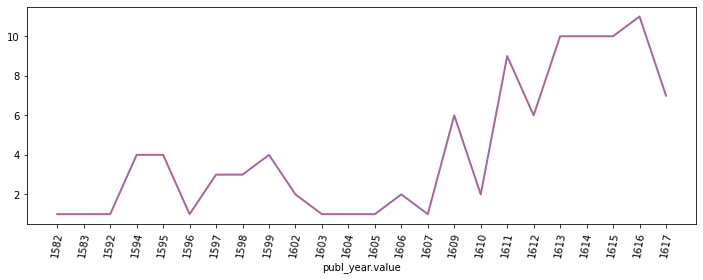

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure( figsize = ( 12, 4))
ax = sns.lineplot( x= nr_books.index , y= nr_books.values , 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()


## Formats

In [56]:
df_unique= df.drop_duplicates(subset=['resource.value'], keep='last')
nr_books = df_unique.groupby('format.value')['resource.value'].count()

In [57]:
nr_books

format.value
12°     5
16°     1
24°     1
2°      4
4°     47
8°     43
Name: resource.value, dtype: int64

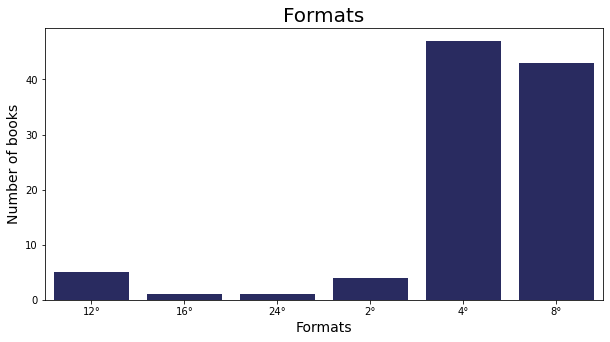

In [63]:
nr_books = nr_books.sort_index()


fig = plt.figure( figsize=( 10 , 5 ) )


graph = sns.barplot( x= nr_books.index, y= nr_books.values,  dodge=False , color = '#202369' )

graph.set_title('Formats' , size = 20) 
graph.set_xlabel('Formats' , size = 14) 
graph.set_ylabel('Number of books' , size = 14 )

plt.show()

In [70]:
df.head()

,resource.type,resource.value,title.type,title.value,author_id.type,author_id.value,author_name.type,author_name.value,format.type,format.value,publ_year.type,publ_year.value,subject_label.type,subject_label.value
0,uri,http://data.bibliotheken.nl/id/nbt/p113724845,literal,Peplvs Græcorvm epigrammatvm: in quo omnes cel...,uri,http://data.bibliotheken.nl/id/thes/p06836914X,literal,Daniel Heinsius,literal,4°,literal,1613,literal,Greek language and literature
1,uri,http://data.bibliotheken.nl/id/nbt/p114621462,literal,Commentariorum de eucharisticâ harmoniâ libr...,uri,http://data.bibliotheken.nl/id/thes/p069398364,literal,Henricus Boxhornius,literal,8°,literal,1595,literal,Theology (Christian doctrine)
2,uri,http://data.bibliotheken.nl/id/nbt/p114621942,literal,Ad Theocriti Syracvsani poetæ Idyllia spicileg...,uri,http://data.bibliotheken.nl/id/thes/p069430489,literal,Joannes Meursius,literal,8°,literal,1597,literal,Greek language and literature
3,uri,http://data.bibliotheken.nl/id/nbt/p114785058,literal,"Tractatus nouus, de iure tutelarum, & curationum.",uri,http://data.bibliotheken.nl/id/thes/p070707561,literal,Paulus Montanus,literal,2°,literal,1595,literal,Law
4,uri,http://data.bibliotheken.nl/id/nbt/p11483749X,literal,Oratio M. Antonii Arnaldi [...] pro vniversita...,uri,http://data.bibliotheken.nl/id/thes/p068656238,literal,Antonius Arnaldus,literal,4°,literal,1594,literal,History (France)


In [75]:
for i,row in df.iterrows():
    print( row['resource.value'] , end = '\t')
    print( row['author_id.value'] , end = '\t' )
    print( row['author_name.value'] )


http://data.bibliotheken.nl/id/nbt/p113724845	http://data.bibliotheken.nl/id/thes/p06836914X	Daniel Heinsius
http://data.bibliotheken.nl/id/nbt/p114621462	http://data.bibliotheken.nl/id/thes/p069398364	Henricus Boxhornius
http://data.bibliotheken.nl/id/nbt/p114621942	http://data.bibliotheken.nl/id/thes/p069430489	Joannes Meursius
http://data.bibliotheken.nl/id/nbt/p114785058	http://data.bibliotheken.nl/id/thes/p070707561	Paulus Montanus
http://data.bibliotheken.nl/id/nbt/p11483749X	http://data.bibliotheken.nl/id/thes/p068656238	Antonius Arnaldus
http://data.bibliotheken.nl/id/nbt/p114839417	http://data.bibliotheken.nl/id/thes/p112823602	Jo. Passeratius
http://data.bibliotheken.nl/id/nbt/p115153098	http://data.bibliotheken.nl/id/thes/p069420688	Lycophron Chalcidensis
http://data.bibliotheken.nl/id/nbt/p115153799	http://data.bibliotheken.nl/id/thes/p069420688	Lycophron Chalcidensis
http://data.bibliotheken.nl/id/nbt/p115523170	http://data.bibliotheken.nl/id/thes/p068556225	Jul. Caes. A. 

## Prayer Book

In [101]:
#schema:genre

#http://data.bibliotheken.nl/doc/thes/p155444875
# //FILTER ( ?publ_year  >= "1450"^^xsd:date && ?date_birth < "1600"^^xsd:date)

# ?book schema:publication ?publ .
# OPTIONAL {
# ?publ schema:startDate ?publ_year . }

#<http://data.bibliotheken.nl/doc/thes/p155444875> 
#?book schema:name ?title .
#

# ?book schema:mainEntityOfPage ?main . 
# ?main schema:mainEntity <http://data.bibliotheken.nl/id/nbt/p322684633> .

query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?book ?title ?publ_year WHERE {  
?book schema:genre <http://data.bibliotheken.nl/id/thes/p155444875> .
?book schema:name ?title . 

OPTIONAL {
?book schema:publication ?publ .
?publ schema:startDate ?publ_year . }

}
"""
book_of_hours = run_query(query)

(2110, 6)
book.value => http://data.bibliotheken.nl/id/nbt/p107193175
title.value => Het vernieuwde paradys-hofken, vol allerhande leer-rijcke- [...] vreughde-gebeden.
publ_year.value => 1700
-------
book.value => http://data.bibliotheken.nl/id/nbt/p107232138
title.value => Hemels palm-hof, ofte Groot getyde-boek.
publ_year.value => 1698
-------
book.value => http://data.bibliotheken.nl/id/nbt/p107493594
title.value => Horae BMV ad usum Windeshemensem
publ_year.value => 15XX
-------
book.value => http://data.bibliotheken.nl/id/nbt/p107702126
title.value => Breviores quaeque elegantioresque epistolae.
publ_year.value => 1518
-------
book.value => http://data.bibliotheken.nl/id/nbt/p107842610
title.value => Horae Beatae Virginis Mariae [ad usum Trajectensem?]
publ_year.value => 14XX
-------
book.value => http://data.bibliotheken.nl/id/nbt/p107938057
title.value => Psalmi poenitentiales cum litaniis
publ_year.value => 151X
-------
book.value => http://data.bibliotheken.nl/id/nbt/p10800258

book.value => http://data.bibliotheken.nl/id/nbt/p840114001
title.value => De C.L. psalmen Davids.
publ_year.value => 1579
-------
book.value => http://data.bibliotheken.nl/id/nbt/p840419066
title.value => Biblia: dat is, De gantsche Heylighe Schrift
publ_year.value => 1611
-------
book.value => http://data.bibliotheken.nl/id/nbt/p840419392
title.value => Biblia: dat is, De gantsche Heylighe Schrift
publ_year.value => 1599
-------
book.value => http://data.bibliotheken.nl/id/nbt/p840419473
title.value => Biblia: dat is, De gantsche Heylighe Schrift
publ_year.value => 1589
-------
book.value => http://data.bibliotheken.nl/id/nbt/p840419538
title.value => Biblia: dat is, De gantsche Heylige Schrift
publ_year.value => 1590
-------
book.value => http://data.bibliotheken.nl/id/nbt/p840467281
title.value => Gebeden, welcke gebruyckt worden by de christelijke gemeynte; toe-gedaen de onverandelijcke confessie van Augsburg
publ_year.value => 1666
-------
book.value => http://data.bibliotheken.n

book.value => http://data.bibliotheken.nl/id/nbt/p416580009
title.value => Les pseavmes de David.
publ_year.value => 1710
-------
book.value => http://data.bibliotheken.nl/id/nbt/p416684890
title.value => Broederschap oft ghemeynsaemheydt van devotie tot [...] Maria, onder de bescherminghe van den [...] keurvorst van Beyeren [...] ende bevestight door Innocentius XI. [...] den 18. augusti 1684
publ_year.value => 1698
-------
book.value => http://data.bibliotheken.nl/id/nbt/p416685668
title.value => Korte oeffeninge voor alle christen menschen, om geheel den dagh met den nacht godtvruchtelijck over te brengen
publ_year.value => 16XX
-------
book.value => http://data.bibliotheken.nl/id/nbt/p417282818
title.value => Reukwerk der heiligen, of Nieuwe geopende schatkamer van gebeeden.
publ_year.value => 1769
-------
book.value => http://data.bibliotheken.nl/id/nbt/p417634579
title.value => Catechismus, ofte Onderwysinge in de christelyke leere, die in de kercken ende scholen der Nederlandsch

book.value => http://data.bibliotheken.nl/id/nbt/p318774623
title.value => De CL psalmen des propheten Davids.
publ_year.value => 1699
-------
book.value => http://data.bibliotheken.nl/id/nbt/p318799677
title.value => [ABC-boek]
publ_year.value => 1639
-------
book.value => http://data.bibliotheken.nl/id/nbt/p318800195
title.value => Cort Ondervvys om wel ende profijtelijck te leeren mediteren.
publ_year.value => 1609
-------
book.value => http://data.bibliotheken.nl/id/nbt/p353976245
title.value => De CL. psalmen des propheten Davids.
publ_year.value => 1678
-------
book.value => http://data.bibliotheken.nl/id/nbt/p421932945
title.value => De CL psalmen des propheten Davids.
publ_year.value => 1697
-------
book.value => http://data.bibliotheken.nl/id/nbt/p42303894X
title.value => Les pseaumes de David
publ_year.value => 17XX
-------
book.value => http://data.bibliotheken.nl/id/nbt/p423046985
title.value => Biblia dat is De gantsche H. schrifture
publ_year.value => 1683
-------
book.va

-------
book.value => http://data.bibliotheken.nl/id/nbt/p408114525
title.value => Het boek der psalmen, nevens de gezangen bij de hervormde kerk van Nederland in gebruik
publ_year.value => 1780
-------
book.value => http://data.bibliotheken.nl/id/nbt/p408114533
title.value => De CL psalmen des propheten Davids.
publ_year.value => 1697
-------
book.value => http://data.bibliotheken.nl/id/nbt/p408155043
title.value => Het boek der psalmen, nevens de gezangen bij de hervormde kerk van Nederland in gebruik
publ_year.value => 1775
-------
book.value => http://data.bibliotheken.nl/id/nbt/p408160012
title.value => Gebeden en oefeningen van godtvruchtigheyt.
publ_year.value => 168X
-------
book.value => http://data.bibliotheken.nl/id/nbt/p408473037
title.value => Nieuw pelgrimken van O.L. Vrouw van S'Hertoghenbosch, rustende inde parochiale kercke der Canonicken regulieren van S. Jacob op Coudenbergh tot Brussel
publ_year.value => 17XX
-------
book.value => http://data.bibliotheken.nl/id/nbt/

In [102]:
book_of_hours.head()

,book.type,book.value,title.type,title.value,publ_year.type,publ_year.value
0,uri,http://data.bibliotheken.nl/id/nbt/p107193175,literal,"Het vernieuwde paradys-hofken, vol allerhande ...",literal,1700
1,uri,http://data.bibliotheken.nl/id/nbt/p107232138,literal,"Hemels palm-hof, ofte Groot getyde-boek.",literal,1698
2,uri,http://data.bibliotheken.nl/id/nbt/p107493594,literal,Horae BMV ad usum Windeshemensem,literal,15XX
3,uri,http://data.bibliotheken.nl/id/nbt/p107702126,literal,Breviores quaeque elegantioresque epistolae.,literal,1518
4,uri,http://data.bibliotheken.nl/id/nbt/p107842610,literal,Horae Beatae Virginis Mariae [ad usum Trajecte...,literal,14XX
